In [ ]:
pip install pandas numpy scikit-learn nltk spacy tensorflow matplotlib seaborn

pandas: Data manipulation and analysis.

numpy: Numerical operations and array handling.

scikit-learn: Machine learning and model building.

nltk: Natural language processing (NLP).

spacy: Advanced NLP tasks with pre-trained models.

tensorflow: Deep learning and neural networks.

matplotlib: Basic plotting and data visualization.

seaborn: Statistical plotting and advanced visualizations.

In [ ]:
# Get the number of rows (tweets) and columns
import pandas as pd
# Load your dataset
train_df = pd.read_csv('/content/train.csv')
num_rows, num_cols = train_df.shape
print(f"Number of tweets: {num_rows}")
print(f"Number of features: {num_cols}")
num_rows, num_cols = train_df.shape
print(f"Number of tweets: {num_rows}")
print(f"Number of features: {num_cols}")

Number of tweets: 7613
Number of features: 5
Number of tweets: 7613
Number of features: 5


In [ ]:
# Get the shape of the DataFrame
print(f"Shape of the dataset: {train_df.shape}")
from sklearn.model_selection import train_test_split
# Assuming 'target' is the label column indicating disaster (1) or not (0)
X = train_df['text']  # Feature: tweet text
y = train_df['target']  # Target: disaster or not
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Shape of the dataset: (7613, 5)
Training set size: 6090
Test set size: 1523


In [ ]:
# Get the shape of the DataFrame
print(f"Shape of the dataset: {train_df.shape}")

Shape of the dataset: (7613, 5)


EDA

In [ ]:
#core packages for text processing
import string
import re
#libraries for text preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
#loading some sklearn packaces for modelling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score
#some packages for word clouds and NER
from wordcloud import WordCloud, STOPWORDS
from collections import Counter, defaultdict
from PIL import Image
import spacy
import en_core_web_sm
#core packages for general use throughout the notebook
import random
import warnings
import time
import datetime
#for customizing our plots
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
#loading pytorch packages
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, BertConfig, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler
#setting some options for general use
stop = set(stopwords.words('english'))
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')
#setting seeds for consistent results
seed_val = 42
random.seed(seed_val)
import numpy as np
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from tqdm.notebook import tqdm
import tensorflow as tf
print(tf.__version__)
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
import os

2.17.0


In [ ]:
from sklearn.model_selection import train_test_split
# Assuming 'target' is the label column indicating disaster (1) or not (0)
X = train_df['text']  # Feature: tweet text
y = train_df['target']  # Target: disaster or not
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 6090
Test set size: 1523


In [ ]:
print(train_df.head())
print(train_df.info())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


to display 5 random rows

In [ ]:
train_df.sample(5)

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


to display the updated number of rows

In [ ]:
print(len(train_df))
train_df = train_df.drop_duplicates('text', keep='last')
print(len(train_df))

7613
7503


printing the number of unique keywords helps you measure the dataset’s characteristics, check for any exceptions , and understand how well the training and testing sets are aligned in terms of main keyword

Unique keywords num=222
Unique keywords num=222


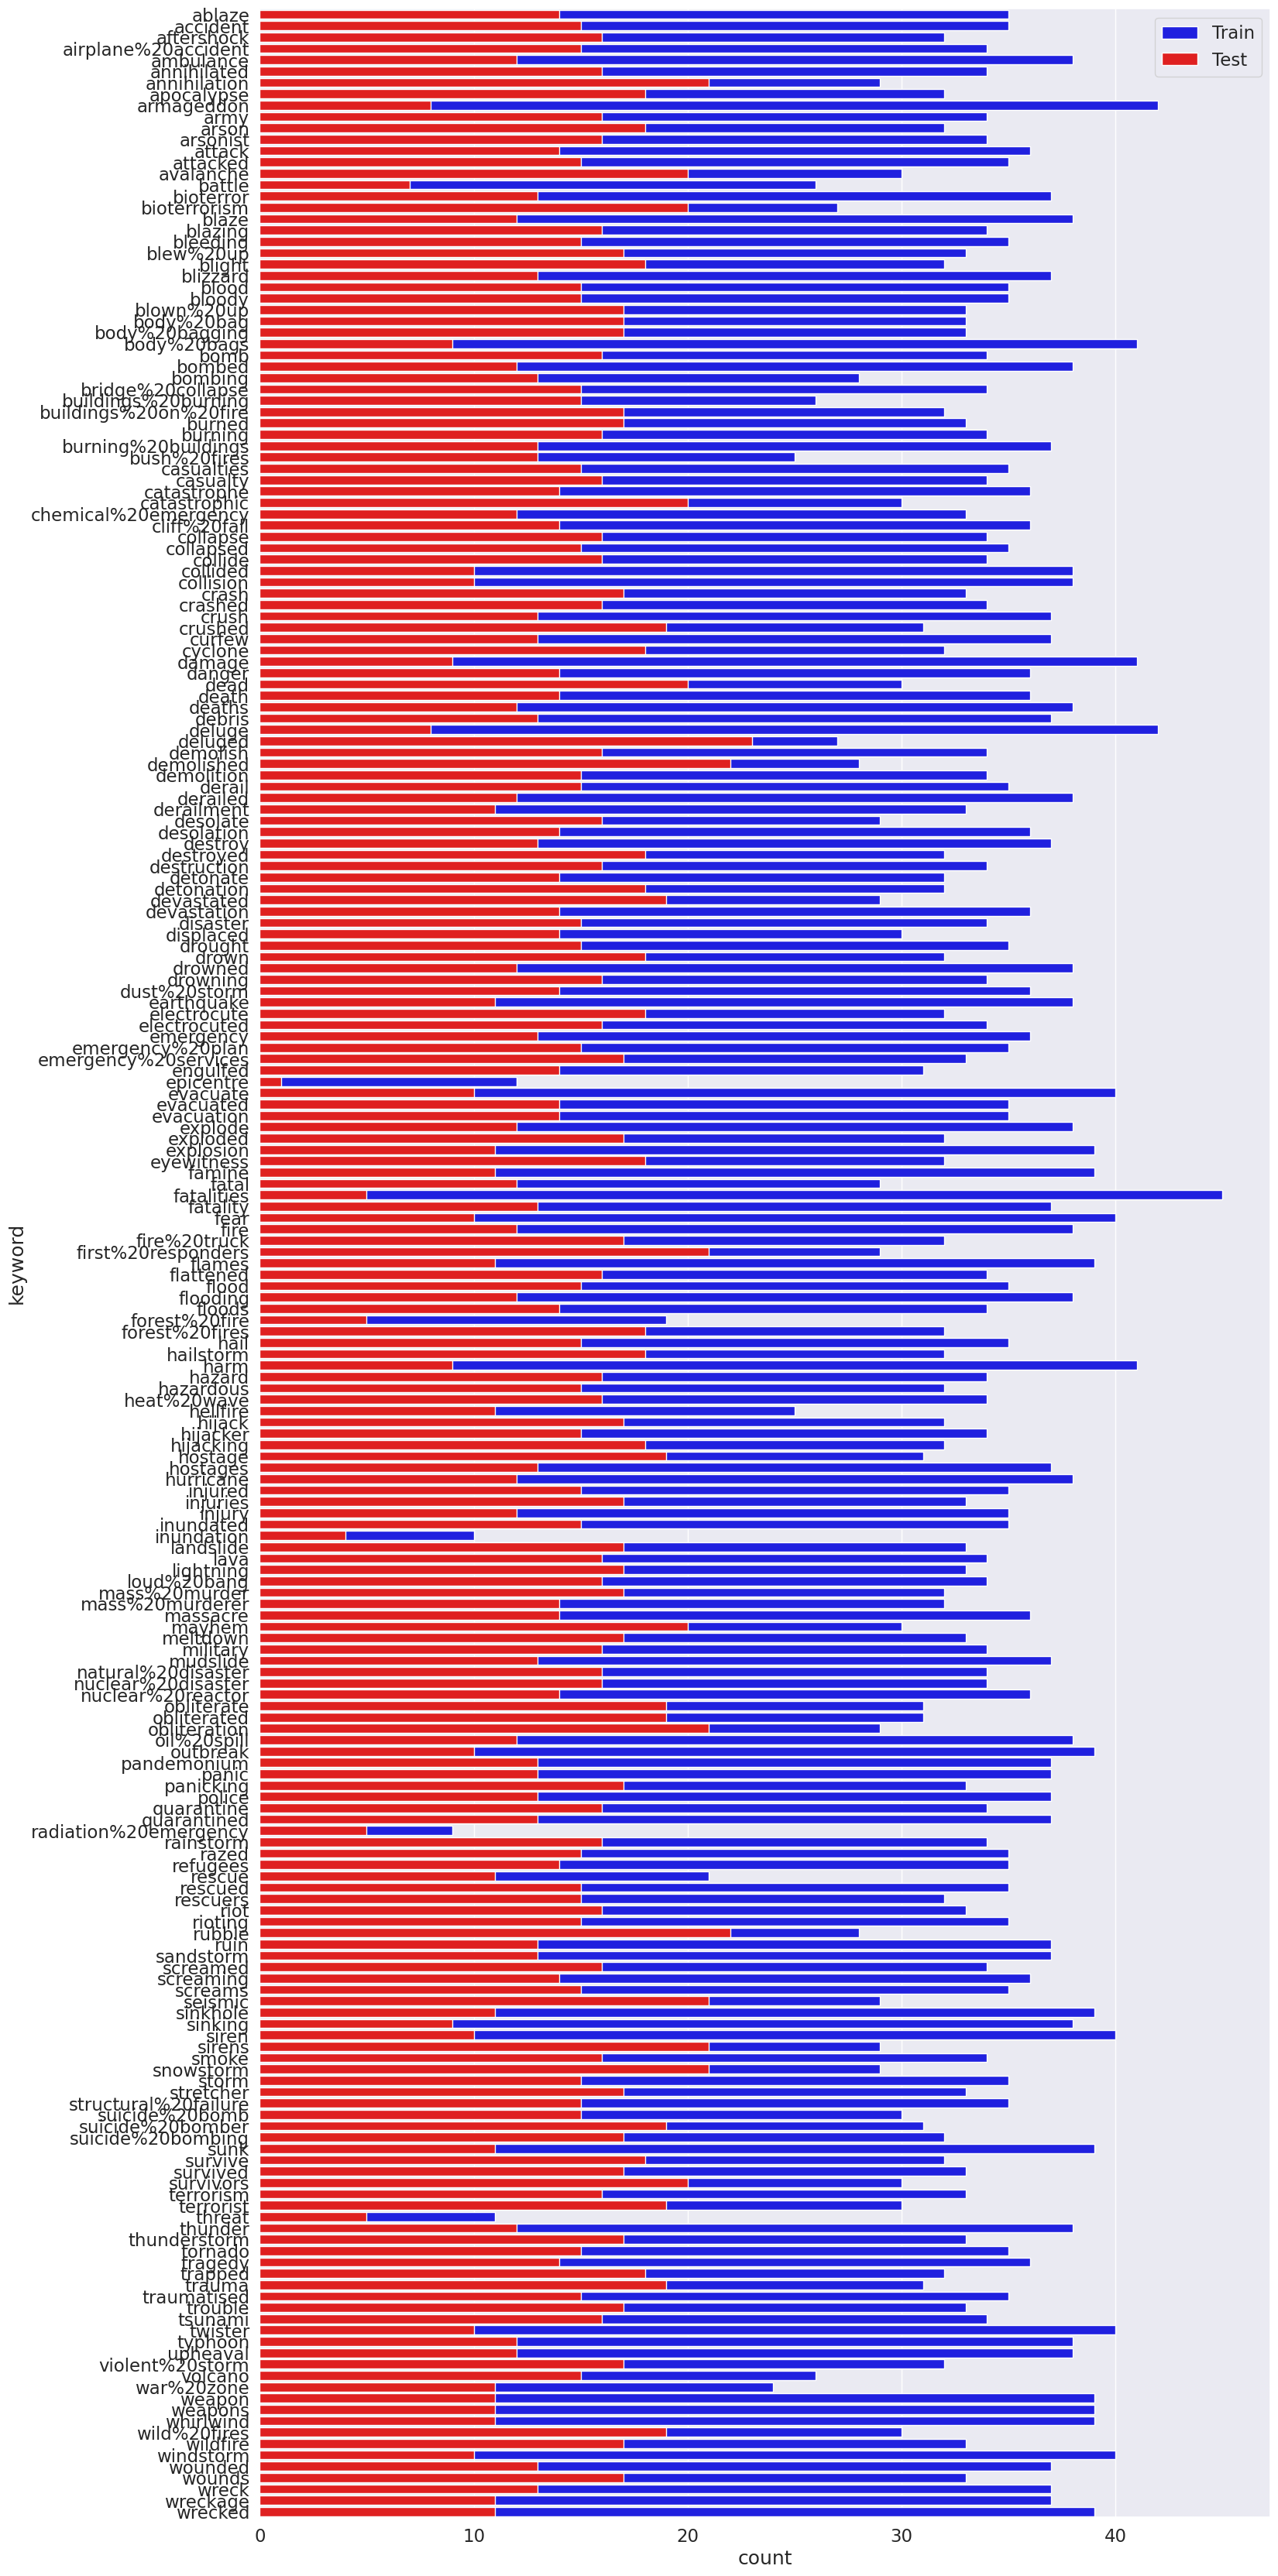

In [ ]:
plt.figure(figsize=(15,40))
#returns an array of unique keyword values
print(f'Unique keywords num={len(train_df.keyword.unique())}')
print(f'Unique keywords num={len(test_df.keyword.unique())}')
sns.countplot(y=train_df['keyword'], color=(0,0,1), label='Train')
sns.countplot(y=test_df['keyword'], color=(1,0,0), label='Test')
#color
plt.legend()

<Axes: xlabel='count', ylabel='keyword'>

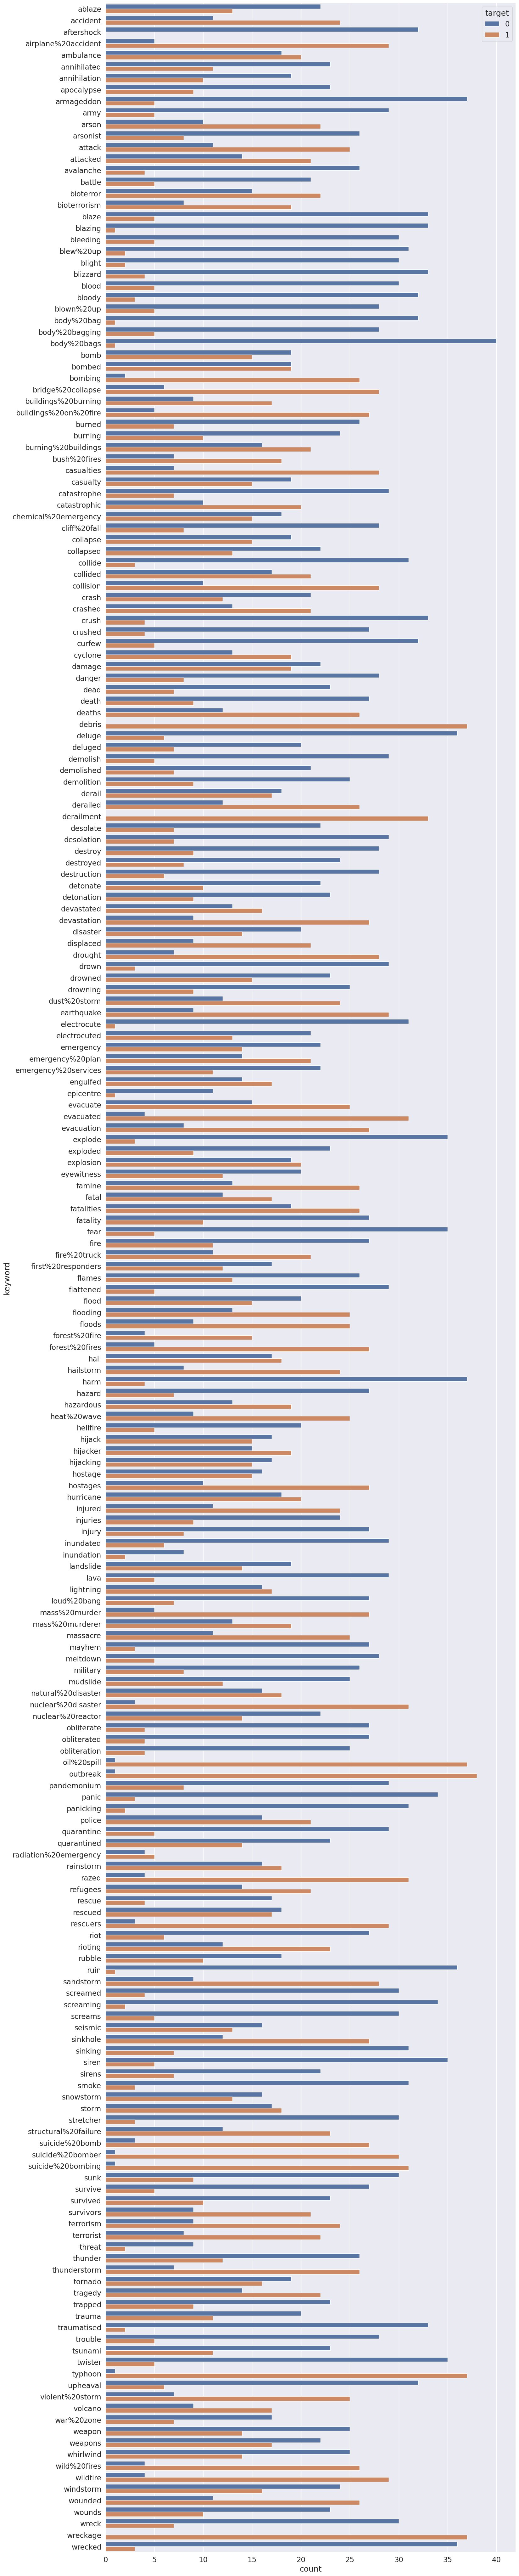

In [ ]:
plt.figure(figsize=(15,100))
sns.countplot(data=train_df, y='keyword', hue='target')
#to compare how each keyword is distributed across different target classes

In [ ]:
#URL Removal and replace with ""
def preprocess_text(text):
    text = re.sub(r"http\S+", "", text)
    return text

In [ ]:
train_df.head(15)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [ ]:
# Some basic helper functions to clean text by removing emojis, html tags and punctuations.
def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)
#applying helper functions
import re
def remove_URL(text):
    # Use regular expression to find and remove URLs
    return re.sub(r'http[s]?://\S+', '', text)
# Example usage:
text_with_url = "Check out this link: https://example.com for more information."
cleaned_text = remove_URL(text_with_url)
print(cleaned_text)  # Output: "Check out this link:  for more information."
train_df['text_clean'] = train_df['text'].apply(lambda x: remove_URL(x))
train_df['text_clean'] = train_df['text_clean'].apply(lambda x: remove_emoji(x))
train_df['text_clean'] = train_df['text_clean'].apply(lambda x: remove_html(x))
train_df['text_clean'] = train_df['text_clean'].apply(lambda x: remove_punct(x))

Check out this link:  for more information.


In [ ]:
#tokenizing the tweet base texts
train_df['tokenized'] = train_df['text_clean'].apply(word_tokenize)
train_df.head()
#lower casing clean text
train_df['lower'] = train_df['tokenized'].apply(
    lambda x: [word.lower() for word in x])
train_df.head()
#removing stopwords
train_df['stopwords_removed'] = train_df['lower'].apply(
    lambda x: [word for word in x if word not in stop])
train_df.head()

,id,keyword,location,text,target,text_clean,tokenized,lower,stopwords_removed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala...","[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [ ]:
#applying part of speech tags list convert words to tuples
train_df['pos_tags'] = train_df['stopwords_removed'].apply(nltk.tag.pos_tag)
train_df.head()

,id,keyword,location,text,target,text_clean,tokenized,lower,stopwords_removed,pos_tags
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[(deeds, NNS), (reason, NN), (earthquake, NN),..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (la, J..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[(residents, NNS), (asked, VBD), (shelter, JJ)..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[(13000, CD), (people, NNS), (receive, JJ), (w..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala...","[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N..."


In [ ]:
#converting part of speeches to wordnet format
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
train_df['wordnet_pos'] = train_df['pos_tags'].apply(
    lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
train_df.head()

,id,keyword,location,text,target,text_clean,tokenized,lower,stopwords_removed,pos_tags,wordnet_pos
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[(deeds, NNS), (reason, NN), (earthquake, NN),...","[(deeds, n), (reason, n), (earthquake, n), (ma..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (la, J...","[(forest, a), (fire, n), (near, n), (la, a), (..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[(residents, NNS), (asked, VBD), (shelter, JJ)...","[(residents, n), (asked, v), (shelter, a), (pl..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[(13000, CD), (people, NNS), (receive, JJ), (w...","[(13000, n), (people, n), (receive, a), (wildf..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala...","[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N...","[(got, v), (sent, a), (photo, n), (ruby, n), (..."


lemmatization reducing words to their base form

In [ ]:
#applying word lemmatizer
wnl = WordNetLemmatizer()

train_df['lemmatized'] = train_df['wordnet_pos'].apply(
    lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

train_df['lemmatized'] = train_df['lemmatized'].apply(
    lambda x: [word for word in x if word not in stop])

train_df['lemma_str'] = [' '.join(map(str, l)) for l in train_df['lemmatized']]

train_df.head()

,id,keyword,location,text,target,text_clean,tokenized,lower,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[(deeds, NNS), (reason, NN), (earthquake, NN),...","[(deeds, n), (reason, n), (earthquake, n), (ma...","[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (la, J...","[(forest, a), (fire, n), (near, n), (la, a), (...","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[(residents, NNS), (asked, VBD), (shelter, JJ)...","[(residents, n), (asked, v), (shelter, a), (pl...","[resident, ask, shelter, place, notify, office...",resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[(13000, CD), (people, NNS), (receive, JJ), (w...","[(13000, n), (people, n), (receive, a), (wildf...","[13000, people, receive, wildfire, evacuation,...",13000 people receive wildfire evacuation order...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala...","[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N...","[(got, v), (sent, a), (photo, n), (ruby, n), (...","[get, sent, photo, ruby, alaska, smoke, wildfi...",get sent photo ruby alaska smoke wildfires pou...


**Visualization**  \
1.Target Distribution


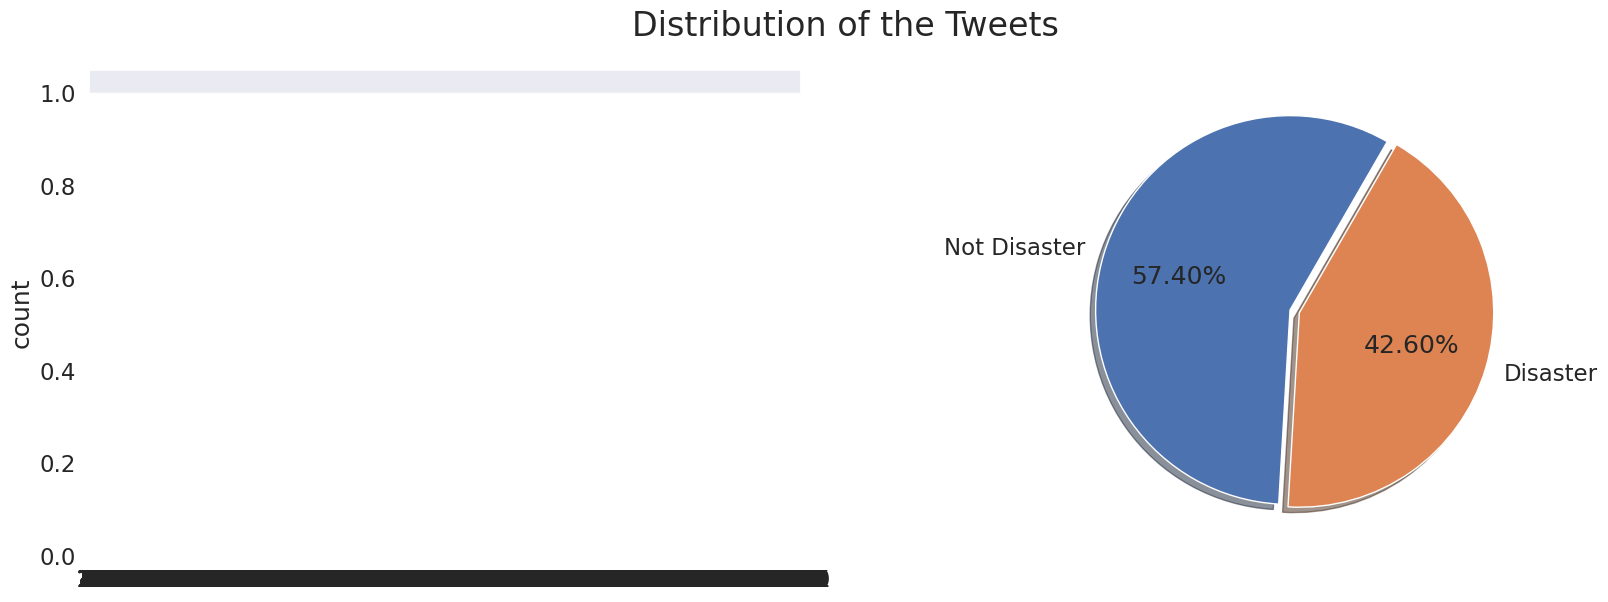

In [ ]:
#displaying target distribution
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), dpi=100)
sns.countplot(train_df['target'], ax=axes[0])
axes[1].pie(train_df['target'].value_counts(),
            #not disaster for 0 and disaster for 1
            labels=['Not Disaster', 'Disaster'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
fig.suptitle('Distribution of the Tweets', fontsize=24)
plt.show()


Word Counts

compares the word count distribution of two sets of text data non disaster tweets and disaster tweets

In [ ]:
def plot_word_number_histogram(textno, textye):
#a function for comparing word counts
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color='#e74c3c')
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Non Disaster Tweets')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('Disaster Tweets')

    fig.suptitle('Words Per Tweet', fontsize=24, va='baseline')

    fig.tight_layout()

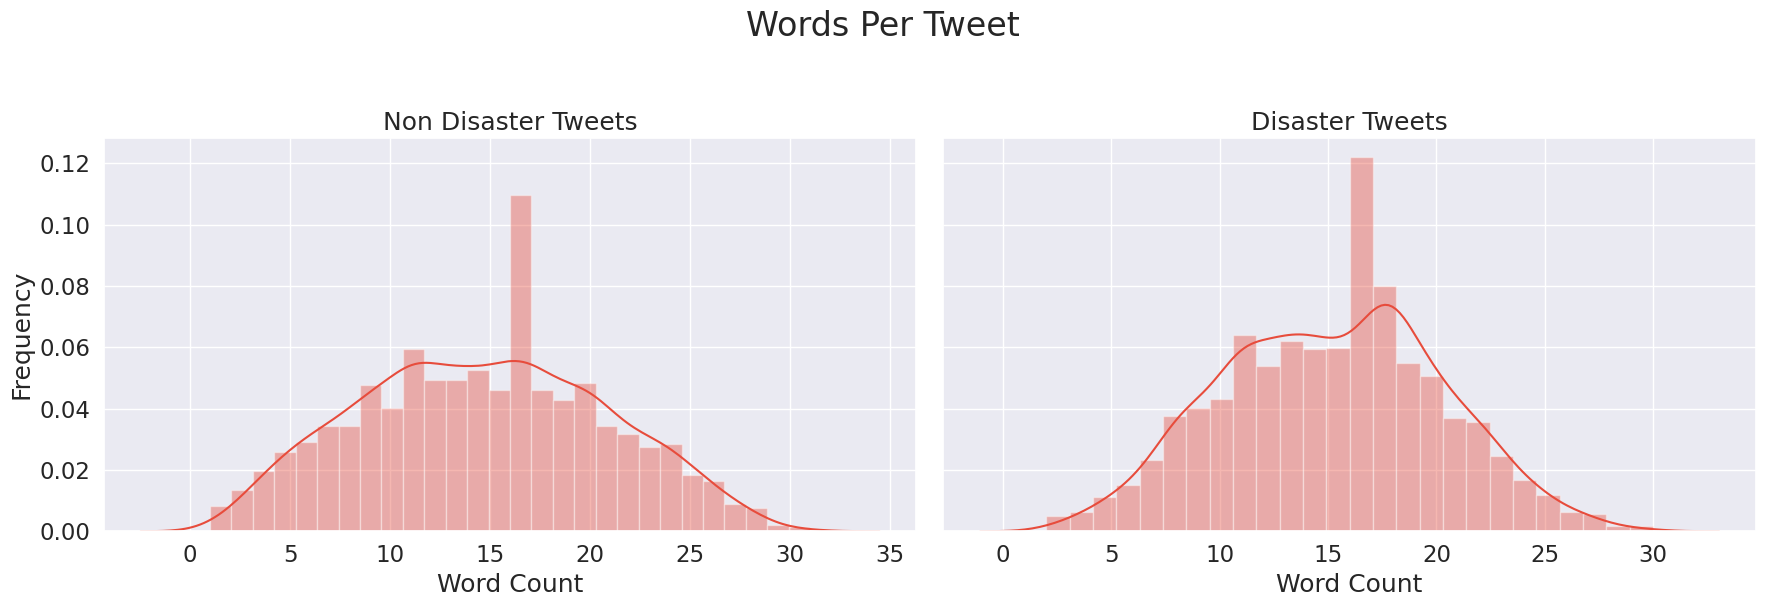

In [ ]:
plot_word_number_histogram(train_df[train_df['target'] == 0]['text'],
                           train_df[train_df['target'] == 1]['text'])

Word Lengths

compares the average word length in two sets of text data non disaster tweets and disaster tweets

In [ ]:
def plot_word_len_histogram(textno, textye):
#A function for comparing average word length
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(textno.str.split().apply(lambda x: [len(i) for i in x]).map(
        lambda x: np.mean(x)),
                 ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().apply(lambda x: [len(i) for i in x]).map(
        lambda x: np.mean(x)),
                 ax=axes[1], color='#e74c3c')
    axes[0].set_xlabel('Word Length')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Non Disaster Tweets')
    axes[1].set_xlabel('Word Length')
    axes[1].set_title('Disaster Tweets')
    fig.suptitle('Mean Word Lengths', fontsize=24, va='baseline')
    fig.tight_layout()

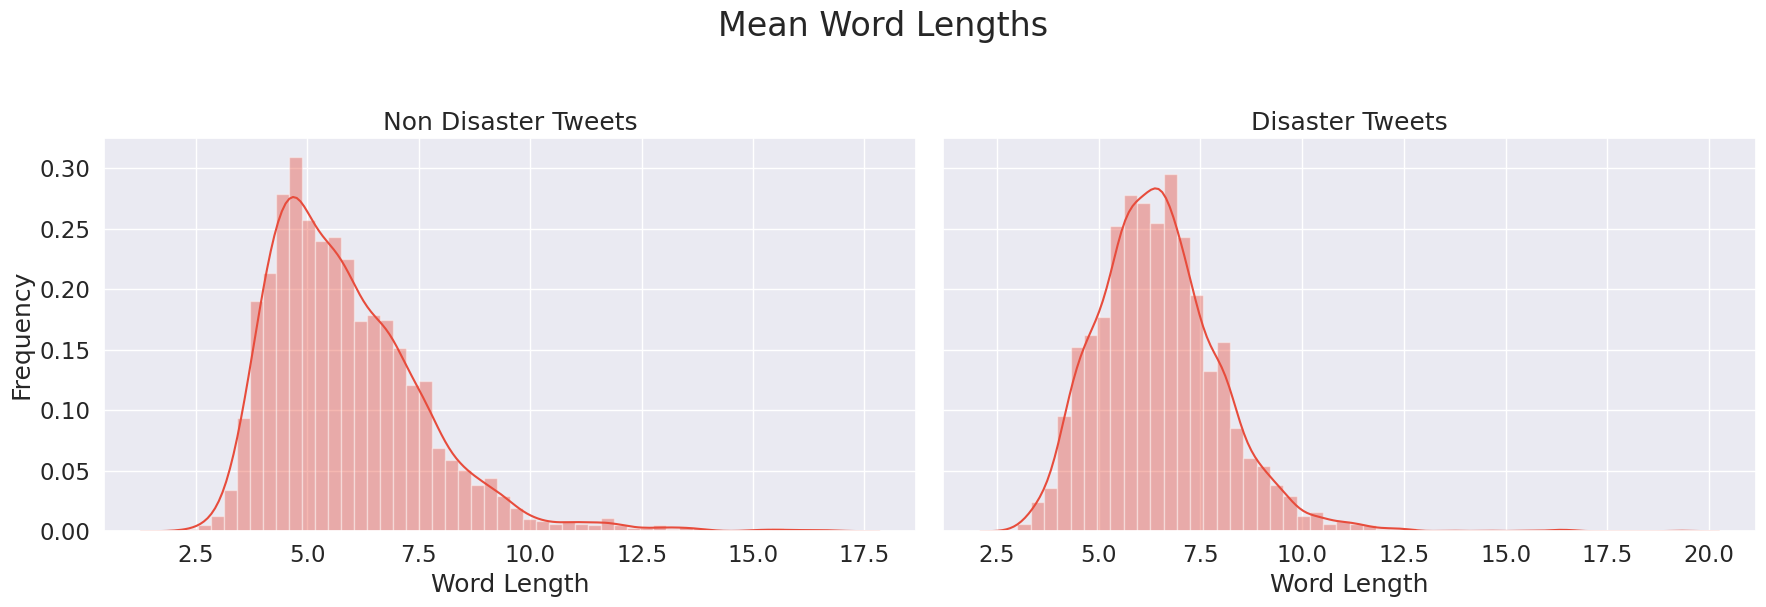

In [ ]:
plot_word_len_histogram(train_df[train_df['target'] == 0]['text'],
                        train_df[train_df['target'] == 1]['text'])

2 lists:

lis[0]: Lemmatised strings from non-disaster tweets (where target is 0)

lis[1]: Lemmatised strings from disaster tweets (where target is 1)

In [ ]:
lis = [
    train_df[train_df['target'] == 0]['lemma_str'],
    train_df[train_df['target'] == 1]['lemma_str']
]

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis, axes):
    try:
        new = i.str.split()
        new = new.values.tolist()
        corpus = [word.lower() for i in new for word in i]
        dic = defaultdict(int)
        for word in corpus:
            if word in stop:
                dic[word] += 1
        top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:15]
        x, y = zip(*top)
        df = pd.DataFrame([x, y]).T
        df = df.rename(columns={0: 'Stopword', 1: 'Count'})
        sns.barplot(x='Count', y='Stopword', data=df, palette='plasma', ax=j)
        plt.tight_layout()
    except:
        plt.close()
        print('No stopwords left in texts.')
        break

No stopwords left in texts.


Most Common Words

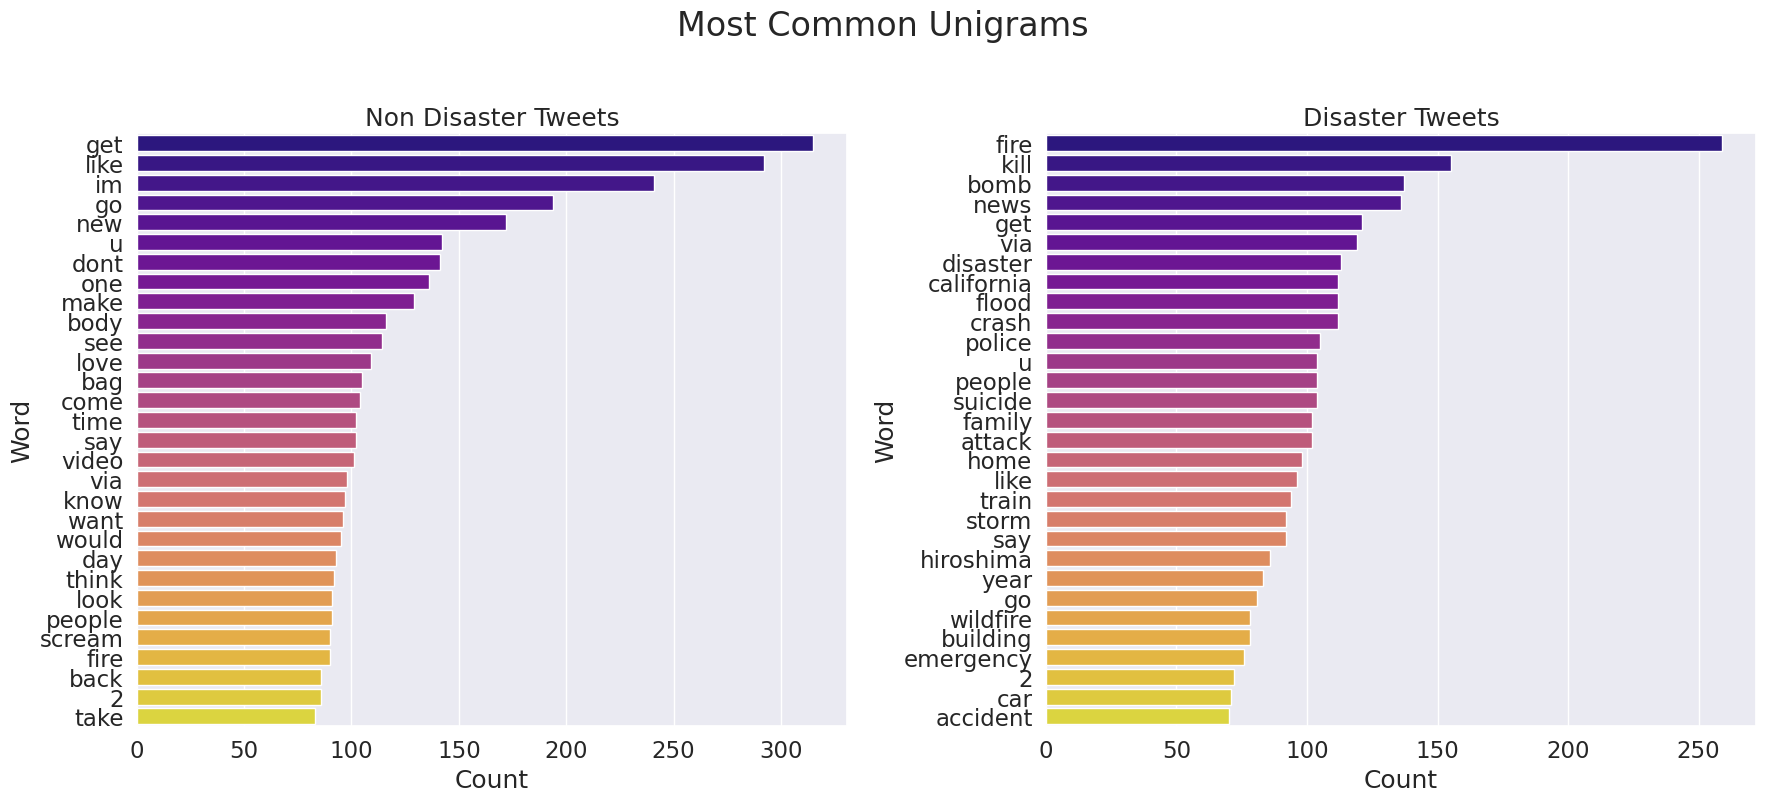

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()
for i, j in zip(lis, axes):
    new = i.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:30]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    sns.barplot(x=y, y=x, palette='plasma', ax=j)
axes[0].set_title('Non Disaster Tweets')
axes[1].set_title('Disaster Tweets')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Word')

fig.suptitle('Most Common Unigrams', fontsize=24, va='baseline')
plt.tight_layout()

most common n-grams

In [ ]:
def ngrams(n, title):
#a Function to plot most common ngrams
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    axes = axes.flatten()
    for i, j in zip(lis, axes):
        new = i.str.split()
        new = new.values.tolist()
        corpus = [word for i in new for word in i]
        def _get_top_ngram(corpus, n=None):
            #getting top ngrams
            vec = CountVectorizer(ngram_range=(n, n),
                                  max_df=0.9,
                                  stop_words='english').fit(corpus)
            bag_of_words = vec.transform(corpus)
            sum_words = bag_of_words.sum(axis=0)
            words_freq = [(word, sum_words[0, idx])
                          for word, idx in vec.vocabulary_.items()]
            words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
            return words_freq[:15]
        top_n_bigrams = _get_top_ngram(i, n)[:15]
        x, y = map(list, zip(*top_n_bigrams))
        sns.barplot(x=y, y=x, palette='plasma', ax=j)
        axes[0].set_title('Non Disaster Tweets')
        axes[1].set_title('Disaster Tweets')
        axes[0].set_xlabel('Count')
        axes[0].set_ylabel('Words')
        axes[1].set_xlabel('Count')
        axes[1].set_ylabel('Words')
        fig.suptitle(title, fontsize=24, va='baseline')
        plt.tight_layout()

Most Common Bigrams

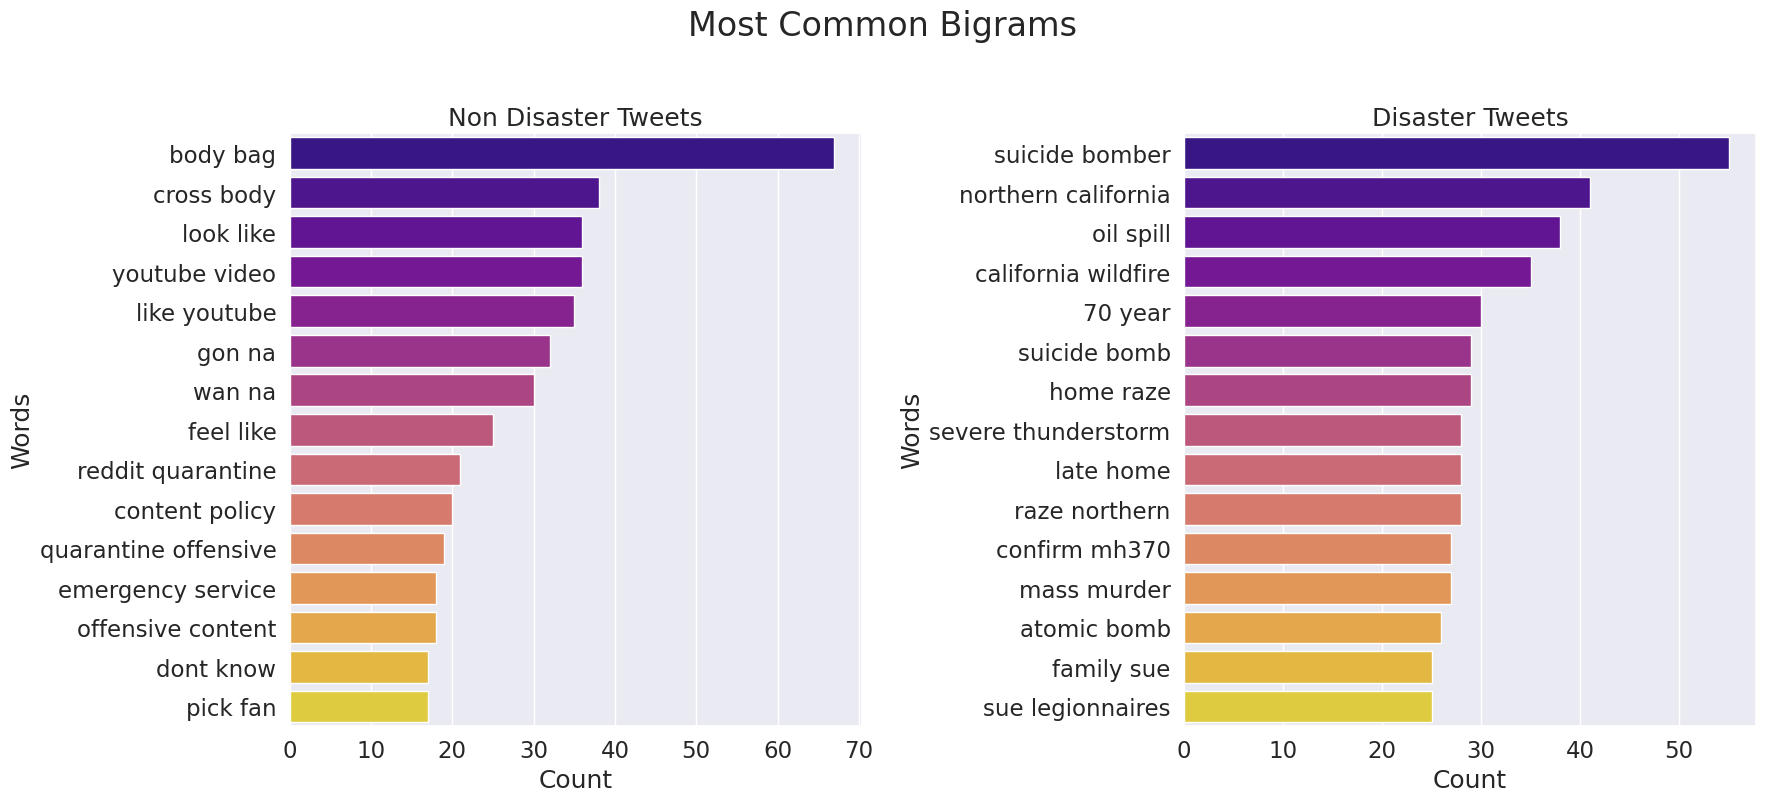

In [ ]:
ngrams(2, 'Most Common Bigrams')

Most Common Trigrams

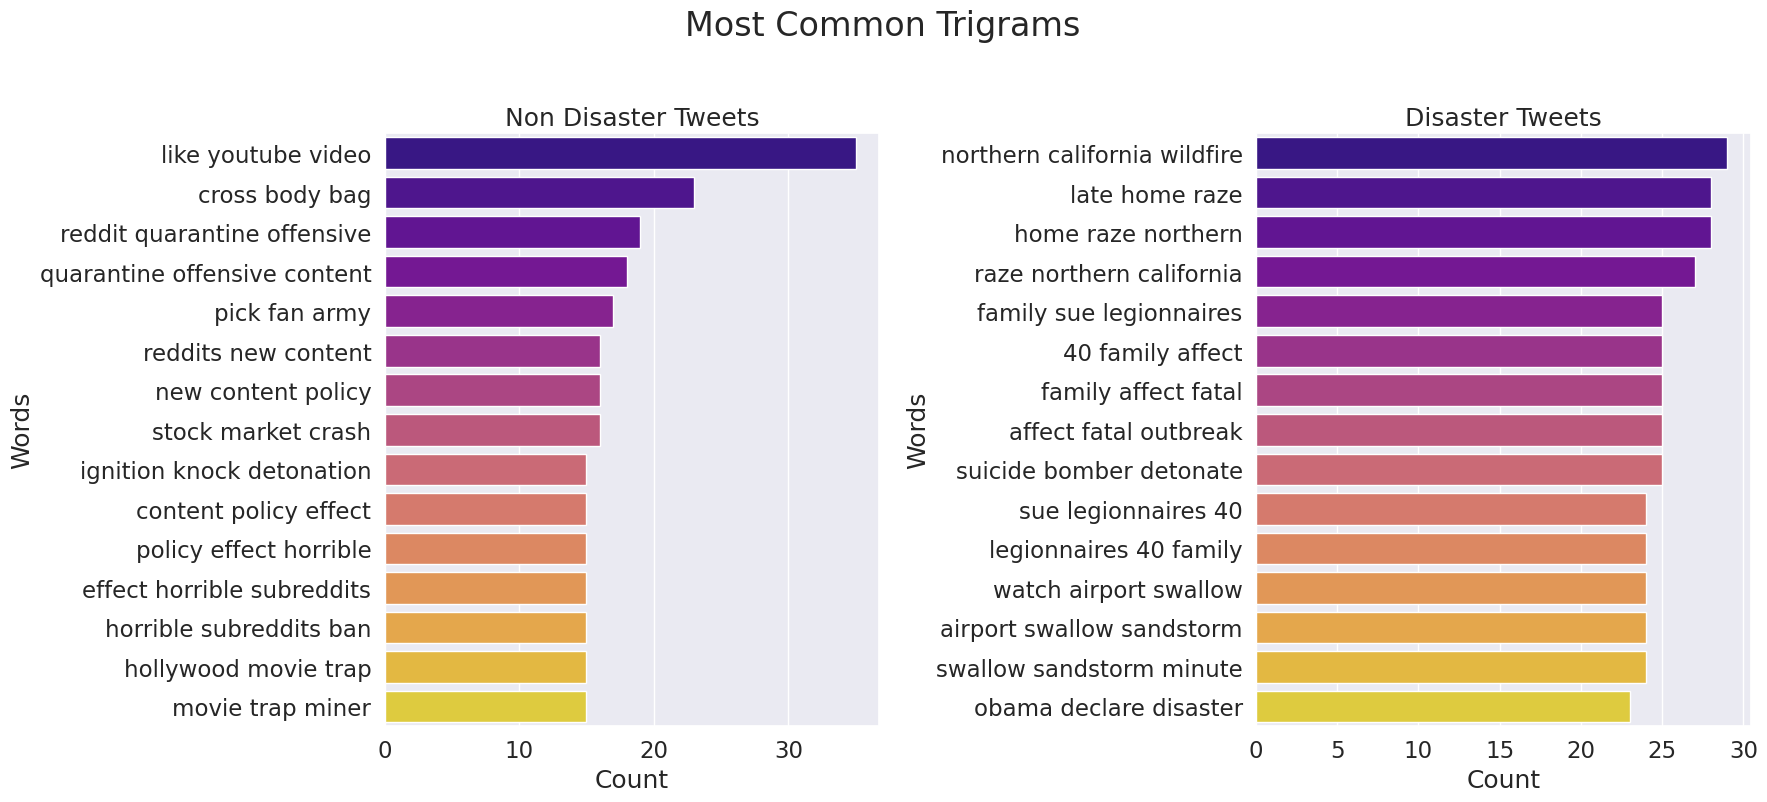

In [ ]:
ngrams(3, 'Most Common Trigrams')

Building the Bert Model

In [ ]:
if torch.cuda.is_available():
    # Tell PyTorch to use the GPU.
    device = torch.device('cuda')
    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device('cpu')

No GPU available, using the CPU instead.


Loading the data for modelling.

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
print(f'Number of training tweets: {train.shape[0]}\n')
print(f'Number of training tweets: {test.shape[0]}\n')
display(train.sample(10))

Number of training tweets: 7613

Number of training tweets: 3263



,id,keyword,location,text,target
7138,10224,volcano,NaN,@MrMikeEaton @Muazimus_Prime hill hill mountai...,1
2151,3086,deaths,Blackpool,Cancers equate for around 25% of all deaths in...,1
4395,6247,hijacking,World,The Murderous Story Of AmericaÛªs First Hijac...,1
2508,3602,desolation,"Birmingham, UK",The date for the release of EP03 DESOLATION is...,1
1378,1987,bush%20fires,London/Bristol/Guildford,On holiday to relax sunbathe and drink ... Put...,0
6825,9775,trapped,????s ?? ????Ìø????Ì¡a,(?EudryLantiqua?) Hollywood Movie About Trappe...,1
3877,5514,flattened,Some other mansion,Flattened all cartoony-like.\n'Whoa there Papa...,0
3465,4957,exploded,NaN,#news #science London warship exploded in 1665...,1
6245,8921,snowstorm,"Brooklyn, NY",'Cooler than Freddie Jackson sippin' a milksha...,0
5664,8083,rescue,Wanderlust,Mary coming to Troy rescue. ?????? https://t.c...,0


Setting target variables, creating combined data and saving index for dividing combined data later

In [ ]:
labels = train['target'].values
idx = len(labels)
combined = pd.concat([train, test])
combined = combined.text.values

Tokenization and Formatting the Inputs

In [ ]:
#converting those tokens into their corresponding numerical IDs based on the model's vocabulary
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

 Print the original tweet

In [ ]:
print(' Original: ', combined[0])
#print the tweet split into tokens
print('Tokenized: ', tokenizer.tokenize(combined[0]))
#print the sentence mapped to token ID's
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(combined[0])))

 Original:  Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Tokenized:  ['our', 'deeds', 'are', 'the', 'reason', 'of', 'this', '#', 'earthquake', 'may', 'allah', 'forgive', 'us', 'all']
Token IDs:  [2256, 15616, 2024, 1996, 3114, 1997, 2023, 1001, 8372, 2089, 16455, 9641, 2149, 2035]


to find the maximum length of a tokenized sentence in the dataset

In [ ]:
max_len = 0
#for every sentence
for text in combined:
    #tokenize the text
    input_ids = tokenizer.encode(text, add_special_tokens=True)
    #update the maximum sentence length
    max_len = max(max_len, len(input_ids))
print('Max sentence length: ', max_len)

Max sentence length:  84


In [ ]:
#list of sentence lenghts
token_lens = []
for text in combined:
    tokens = tokenizer.encode(text, max_length = 512)
    token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


displaying sentence length dist.

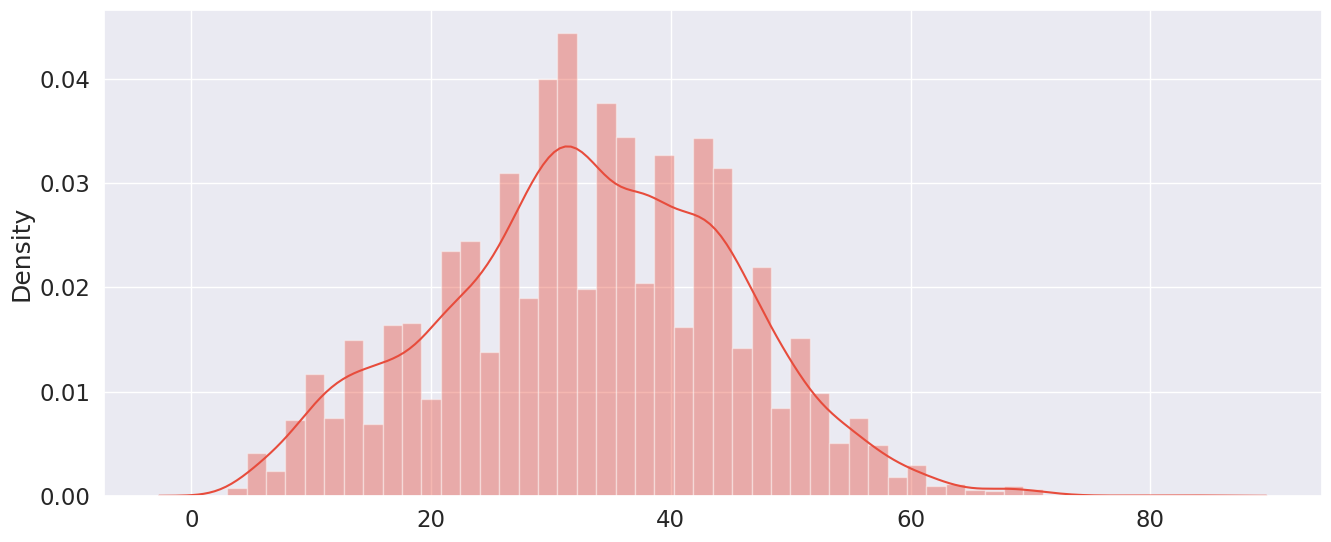

In [ ]:
fig, axes = plt.subplots(figsize=(14, 6))
sns.distplot(token_lens, color='#e74c3c')
plt.show()

we choose max len of 84 since it's the longest sentence we have here, playing with this number might get different results but the bigger we choose the slower the model will be

splitting the train test data after tokenizing.

In [ ]:
train= combined[:idx]
test = combined[idx:]
train.shape

(7613,)

In [ ]:
def tokenize_map(sentence,labs='None'):
#a function for tokenize all of the sentences and map the tokens to their word IDs
    global labels
    input_ids = []
    attention_masks = []
    for text in sentence:
        #   "encode_plus" will:
        #   (1) Tokenize the sentence
        #   (2) Prepend the `[CLS]` token to the start
        #   (3) Append the `[SEP]` token to the end
        #   (4) Map tokens to their IDs
        #   (5) Pad or truncate the sentence to `max_length`
        #   (6) Create attention masks for [PAD] tokens Instead of padding individual words, we pad the entire input sequence to a uniform length
        encoded_dict = tokenizer.encode_plus(
                            text,                      # Sentence to encode.
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            truncation='longest_first', # Activate and control truncation
                            max_length = 84,           # Max length according to our text data.
                            pad_to_max_length = True, # Pad & truncate all sentences.
                            return_attention_mask = True,   # Construct attn. masks.
                            return_tensors = 'pt',     # Return pytorch tensors.
                       )
        # Add the encoded sentence to the id list.
        input_ids.append(encoded_dict['input_ids'])
        # And its attention mask differentiates padding from non-padding
        attention_masks.append(encoded_dict['attention_mask'])
    # Convert the lists into tensors
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    if labs != 'None': # Setting this for using this definition for both train and test data so labels won't be a problem in our outputs.
        labels = torch.tensor(labels)
        return input_ids, attention_masks, labels
    else:
        return input_ids, attention_masks

Tokenizing all of the train test sentences and mapping the tokens to their word IDs.


Prepares input sentences for a BERT model by tokenizing them and converting them into input IDs and attention masks.

Supports the inclusion of labels for supervised learning tasks.

Ensures that all sentences are of the same length through padding and truncation, allowing for efficient batch processing by the model.

In [ ]:
# Importing the necessary libraries
from transformers import BertTokenizer
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Example text data
text_data = ["Hello, how are you?", "This is a test sentence."]

# Tokenizing example sentences
encoded_data = [tokenizer.encode_plus(
    text,
    add_special_tokens=True,  # Add [CLS] and [SEP]
    max_length=64,            # Maximum length
    padding='max_length',     # Pad to max length
    truncation=True,          # Truncate longer sentences
    return_attention_mask=True,  # Return attention masks
    return_tensors='pt'       # Return as PyTorch tensors
) for text in text_data]

# Extract input_ids and attention masks
input_ids = torch.cat([item['input_ids'] for item in encoded_data], dim=0)
attention_masks = torch.cat([item['attention_mask'] for item in encoded_data], dim=0)

# Combine inputs into a TensorDataset
labels = torch.tensor([0, 1])  # Example labels
dataset = TensorDataset(input_ids, attention_masks, labels)

# Now you can create DataLoaders, etc.
batch_size = 32
train_dataloader = DataLoader(dataset, sampler=RandomSampler(dataset), batch_size=batch_size)

def tokenize_map(sentence, labs=None):
    input_ids = []
    attention_masks = []

    for sent in sentence:
        # Tokenize and encode the sentences
        encoded_dict = tokenizer.encode_plus(
            sent,
            add_special_tokens=True,
            max_length=64,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    if labs is not None:  # Checking if labs is provided
        labels = torch.tensor(labs)
        return input_ids, attention_masks, labels
    else:
        return input_ids, attention_masks


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

this code takes input data (input IDs, attention masks, and labels), bundles them into a dataset, splits the dataset into training and validation sets, and then prints out the number of samples in each set.*italicized text*

In [ ]:
#combine the training inputs into a TensorDataset
dataset = TensorDataset(input_ids, attention_masks, labels)
#create a 80-20 train-validation split
#calculate the number of samples to include in each set
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
#divide the dataset by randomly selecting samples
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

    1 training samples
    1 validation samples


This code creates data loaders for both training and validation sets.
During training, batches are selected randomly to help the model generalize better

In [ ]:
# The DataLoader needs to know our batch size for training, so we specify it here.
#For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32.
batch_size = 32
# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
train_df = pd.DataFrame()
train_dataloader = DataLoader(
            train_df,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )
# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

making predictions on unseen data without using labels

In [ ]:
prediction_data = TensorDataset(input_ids, attention_masks)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Setting the Bert Classification Mode

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    'bert-large-uncased', # Use the 124-layer, 1024-hidden, 16-heads, 340M parameters BERT model with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification. You can increase this for multi-class tasks.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)
# Tell pytorch to run this model on the device which we set GPU in our case.
model.to(device)

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-large-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1

get all of the model's parameters as a list of tuples

In [ ]:
params = list(model.named_parameters())
print('The BERT model has {:} different named parameters.\n'.format(len(params)))
print('==== Embedding Layer ====\n')
for p in params[0:5]:
    print('{:<55} {:>12}'.format(p[0], str(tuple(p[1].size()))))
print('\n==== First Transformer ====\n')
for p in params[5:21]:
    print('{:<55} {:>12}'.format(p[0], str(tuple(p[1].size()))))
print('\n==== Output Layer ====\n')
for p in params[-4:]:
    print('{:<55} {:>12}'.format(p[0], str(tuple(p[1].size()))))

The BERT model has 393 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 1024)
bert.embeddings.position_embeddings.weight               (512, 1024)
bert.embeddings.token_type_embeddings.weight               (2, 1024)
bert.embeddings.LayerNorm.weight                             (1024,)
bert.embeddings.LayerNorm.bias                               (1024,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight        (1024, 1024)
bert.encoder.layer.0.attention.self.query.bias               (1024,)
bert.encoder.layer.0.attention.self.key.weight          (1024, 1024)
bert.encoder.layer.0.attention.self.key.bias                 (1024,)
bert.encoder.layer.0.attention.self.value.weight        (1024, 1024)
bert.encoder.layer.0.attention.self.value.bias               (1024,)
bert.encoder.layer.0.attention.output.dense.weight      (1024, 1024)
bert.encoder.layer.0.attention.output.dense.bias             (

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 6e-6, # args.learning_rate
                  eps = 1e-8 # args.adam_epsilon
                )

Number of training epochs, the BERT authors recommend between 2 and 4.

In [ ]:
epochs = 3
# Total number of training steps is [number of batches] x [number of epochs]
total_steps = len(train_dataloader) * epochs
# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

Training and Evaluating

In [ ]:
def flat_accuracy(preds, labels):
#A function for calculating accuracy scores
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return accuracy_score(labels_flat, pred_flat)
def flat_f1(preds, labels):
#A function for calculating f1 scores
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, pred_flat)

In [ ]:
def format_time(elapsed):
#A function that takes a time in seconds and returns a string hh:mm:ss
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import pandas as pd
import numpy as np
import time
# Load your dataset
train_df = pd.read_csv('/content/train.csv')
X = train_df['text'].values
y = train_df['target'].values
# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Tokenization and encoding
input_ids = []
attention_masks = []
for text in X:
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=64,
        truncation=True,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='pt'
    )
    input_ids.append(encoding['input_ids'])
    attention_masks.append(encoding['attention_mask'])

# Convert lists to tensors
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(y)

# Create a TensorDataset
dataset = TensorDataset(input_ids, attention_masks, labels)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders with reduced batch size
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)  # Reduced batch size
val_dataloader = DataLoader(val_dataset, batch_size=8)

# Initialize the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.to(device)

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training loop with reduced epochs
epochs = 1  # Reduced epochs
total_t0 = time.time()

for epoch_i in range(epochs):
    print(f'======== Epoch {epoch_i + 1} / {epochs} ========')
    print('Training...')

    total_train_loss = 0
    model.train()

    for step, batch in enumerate(train_dataloader):
        print(f'  Batch {step} of {len(train_dataloader)}')  # Debugging output

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        print(f'Input IDs shape: {b_input_ids.shape}')  # Debugging output
        print(f'Input Mask shape: {b_input_mask.shape}')  # Debugging output
        print(f'Labels shape: {b_labels.shape}')  # Debugging output
        model.zero_grad()
        try:
            outputs = model(b_input_ids,
                             attention_mask=b_input_mask,
                             labels=b_labels)
            loss = outputs.loss
            total_train_loss += loss.item()
        except Exception as e:
            print(f"Error during model forward pass: {e}")
            break  # Break the loop if there's an error
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    training_time = format_time(time.time() - total_t0)

    print(f'  Average training loss: {avg_train_loss:.2f}')
    print(f'  Training epoch took: {training_time}')
    # Validation
    print('Running Validation...')
    model.eval()
    total_eval_loss = 0
    total_eval_accuracy = 0
    for batch in val_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        with torch.no_grad():
            outputs = model(b_input_ids,
                             attention_mask=b_input_mask,
                             labels=b_labels)
        loss = outputs.loss
        total_eval_loss += loss.item()
        logits = outputs.logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        total_eval_accuracy += np.sum(np.argmax(logits, axis=1) == label_ids)
    avg_val_accuracy = total_eval_accuracy / len(val_dataset)
    avg_val_loss = total_eval_loss / len(val_dataloader)
    print(f'  Validation Loss: {avg_val_loss:.2f}')
    print(f'  Validation Accuracy: {avg_val_accuracy:.2f}')
print(f'Training complete! Total training time: {format_time(time.time() - total_t0)}')

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


======== Epoch 1 / 1 ========
Training...
  Batch 0 of 762
Input IDs shape: torch.Size([8, 64])
Input Mask shape: torch.Size([8, 64])
Labels shape: torch.Size([8])
  Batch 1 of 762
Input IDs shape: torch.Size([8, 64])
Input Mask shape: torch.Size([8, 64])
Labels shape: torch.Size([8])
  Batch 2 of 762
Input IDs shape: torch.Size([8, 64])
Input Mask shape: torch.Size([8, 64])
Labels shape: torch.Size([8])
  Batch 3 of 762
Input IDs shape: torch.Size([8, 64])
Input Mask shape: torch.Size([8, 64])
Labels shape: torch.Size([8])
  Batch 4 of 762
Input IDs shape: torch.Size([8, 64])
Input Mask shape: torch.Size([8, 64])
Labels shape: torch.Size([8])
  Batch 5 of 762
Input IDs shape: torch.Size([8, 64])
Input Mask shape: torch.Size([8, 64])
Labels shape: torch.Size([8])
  Batch 6 of 762
Input IDs shape: torch.Size([8, 64])
Input Mask shape: torch.Size([8, 64])
Labels shape: torch.Size([8])
  Batch 7 of 762
Input IDs shape: torch.Size([8, 64])
Input Mask shape: torch.Size([8, 64])
Labels shape

Predicting

In [ ]:
# Prediction on test set:
print('Predicting labels for {:,} test sentences...'.format(len(b_input_ids)))
# Put model in evaluation mode:
model.eval()
# Tracking variables :
predictions = []
# Predict:
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  # Unpack the inputs from our dataloader:
  b_input_ids, b_input_mask, = batch
  # Telling the model not to compute or store gradients, saving memory and speeding up prediction:
  with torch.no_grad():
      # Forward pass, calculate logit predictions:
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)
  logits = outputs[0]
  # Move logits and labels to CPU:
  logits = logits.detach().cpu().numpy()
  # Store predictions and true labels:
  predictions.append(logits)
print(' DONE.')

Predicting labels for 3 test sentences...
 DONE.


Getting list of predictions and then choosing the target value with using argmax on probabilities.

In [ ]:
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

plots

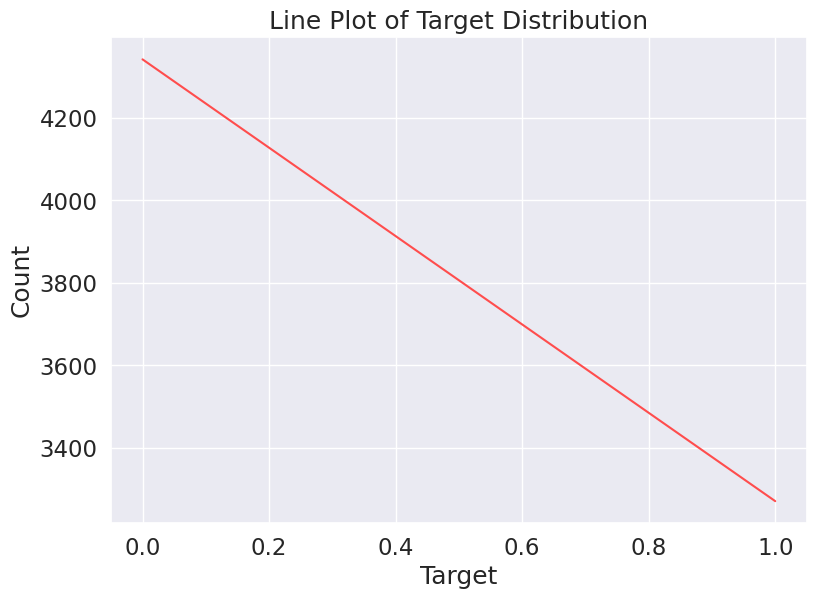

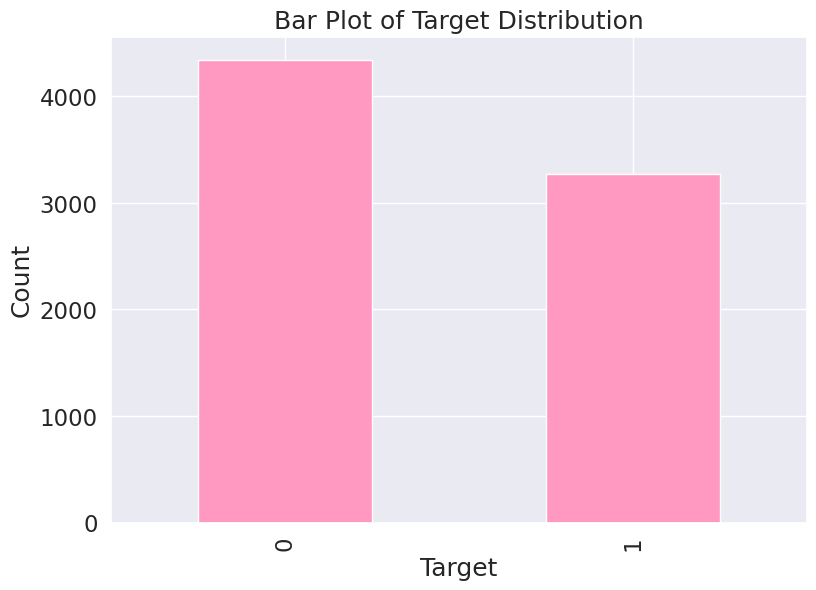

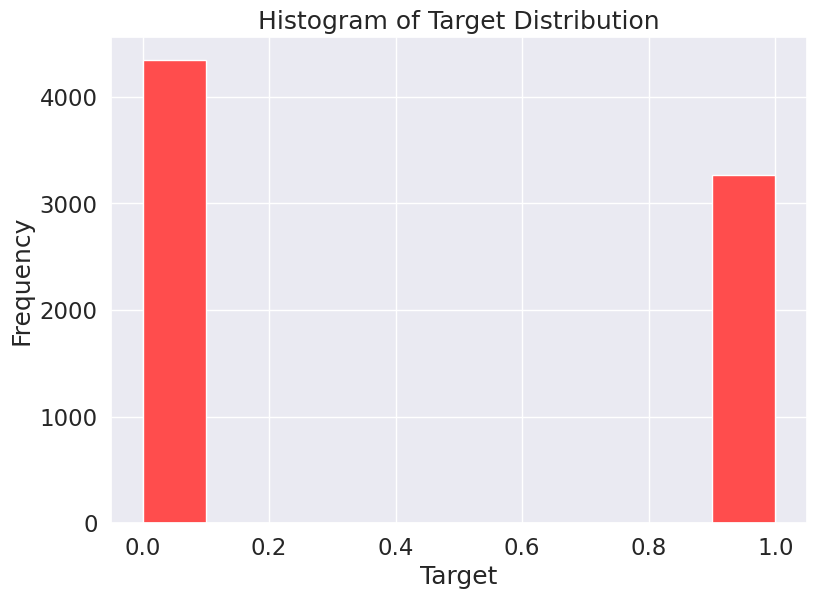

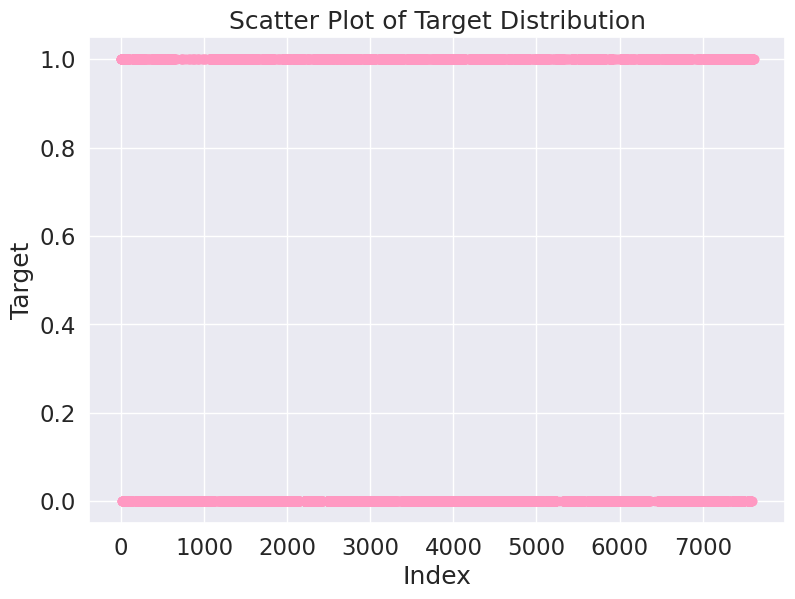

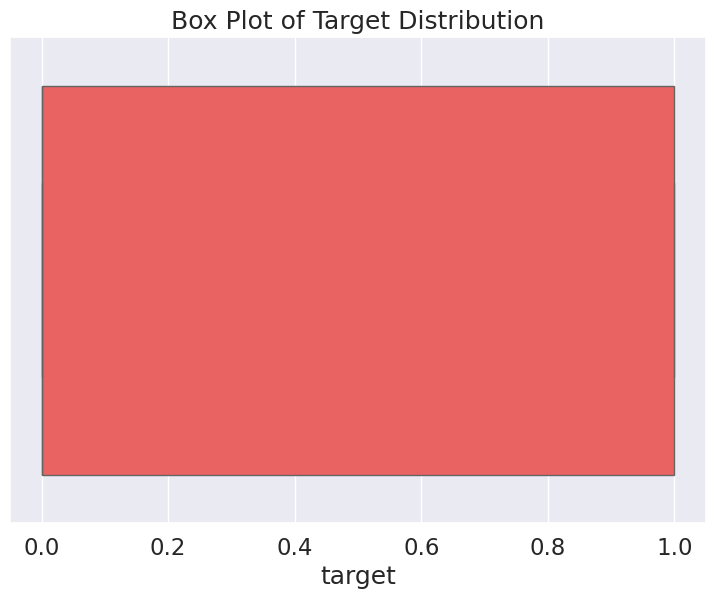

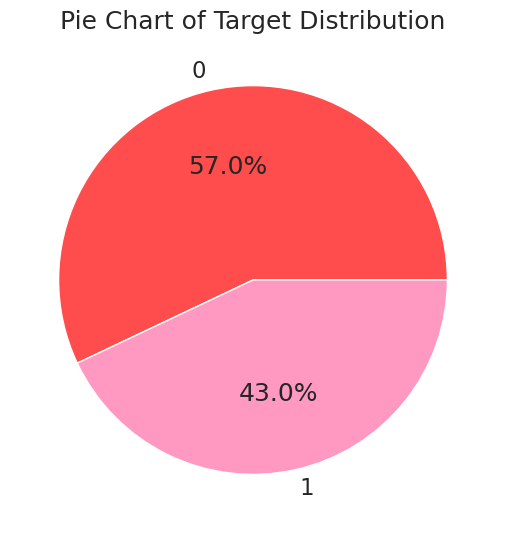

Index(['id', 'target'], dtype='object')


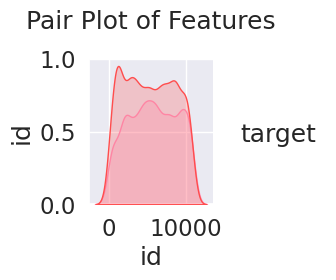

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color palette for red and pink
red_pink_palette = ['#ff4d4d', '#ff99c2']
# Line plot
plt.figure(figsize=(8, 6))
train_df['target'].value_counts().sort_index().plot(kind='line', color=red_pink_palette[0])
plt.title('Line Plot of Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()
# Bar plot
plt.figure(figsize=(8, 6))
train_df['target'].value_counts().plot(kind='bar', color=red_pink_palette[1])
plt.title('Bar Plot of Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()
# Histogram
plt.figure(figsize=(8, 6))
train_df['target'].plot(kind='hist', color=red_pink_palette[0], bins=10)
plt.title('Histogram of Target Distribution')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(train_df.index, train_df['target'], color=red_pink_palette[1])
plt.title('Scatter Plot of Target Distribution')
plt.xlabel('Index')
plt.ylabel('Target')
plt.show()
# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['target'], palette=red_pink_palette)
plt.title('Box Plot of Target Distribution')
plt.show()
# Pie chart
plt.figure(figsize=(8, 6))
train_df['target'].value_counts().plot(kind='pie', colors=red_pink_palette, autopct='%1.1f%%')
plt.title('Pie Chart of Target Distribution')
plt.ylabel('')  # Hides the y-label
plt.show()
# Pair plot (if there are numeric features)
print(train_df.select_dtypes(include='number').columns)
numeric_cols = train_df.select_dtypes(include='number').columns  # Get numeric columns
if len(numeric_cols) > 1:  # Ensure there are enough numeric columns for a pair plot
    sns.pairplot(train_df[numeric_cols], hue='target', palette=red_pink_palette)
    plt.title('Pair Plot of Features')
    plt.show()
else:
    print("Not enough numeric columns for pairplot.")

In [ ]:
!pip install gradio transformers torch

In [ ]:
import gradio as gr
import torch
from transformers import BertTokenizer, BertForSequenceClassification
# Load the pre-trained model and tokenizer
model = BertForSequenceClassification.from_pretrained('bert-large-uncased', num_labels=2)
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')
# Load the model onto the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
# Function to make predictions
def classify_tweet(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=84).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    prediction = torch.argmax(logits, dim=1).item()
    label = "Disaster" if prediction == 1 else "Not Disaster"
    return label
# Set up Gradio interface
iface = gr.Interface(fn=classify_tweet,
                     inputs="text",
                     outputs="label",
                     title="Disaster Tweet Classifier",
                     description="Enter a tweet to classify if it's related to a disaster or not using a fine-tuned BERT model.")
# Launch the interface
iface.launch()